# Ovary and subtypes

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [1]:
import numpy as np
import pandas as pd
import time
import os
import pickle
import sys
from importlib import reload


from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from utils import CancerType

In [8]:
reload(sys.modules['utils'])
from utils import CancerType

## First label grouping

### Initialization

In [10]:
ovary = CancerType('Ovary')

In [11]:
ovary.labels

array(['84413', '84413', '84413', ..., '84421', '84421', '84421'],
      dtype=object)

In [12]:
ovary.countSubtypes()

[['80103' 761]
 ['81403' 111]
 ['83103' 24]
 ['83803' 11]
 ['84413' 964]
 ['84421' 45]
 ['84700' 57]
 ['84800' 60]
 ['C48.2' 13]
 ['C56' 38]
 ['None' 21]]


```
8010/3 Carcinoma
8140/3 Adenocarcinoma
8310/3 Clear Cell Adenocarcinoma
8380/3 Endometrioid adenocarcinoma
8441/3 Serous carcinoma
8442/1 Serous tumor
8470/0 Mucinous cystadenoma
8480/0 Mucinous adenoma
```

In [13]:
code_remap = {'80103':'Carcinoma', 
              '81403':'Adenocarcinoma', 
              '83103':'Adenocarcinoma', 
              '83803':'Adenocarcinoma',
              '84413':'Serous carcinoma',
              '84421':'Serous carcinoma',
              '84700':'Mucinous cystadenoma',
              '84800':'Mucinous cystadenoma',
              'C48.2':'Not specified',
              'C56':'Not specified',
              'None':'Not specified'}

In [14]:
ovary.relabel(code_remap)

In [15]:
ovary.countSubtypes()

[['Adenocarcinoma' 146]
 ['Carcinoma' 761]
 ['Mucinous cystadenoma' 117]
 ['Not specified' 72]
 ['Serous carcinoma' 1009]]


PCA done! Time elapsed: 0.23465871810913086 seconds
Cumulative explained variation for 50 principal components: 0.8444829028594438
t-SNE done! Time elapsed: 18.824793815612793 seconds


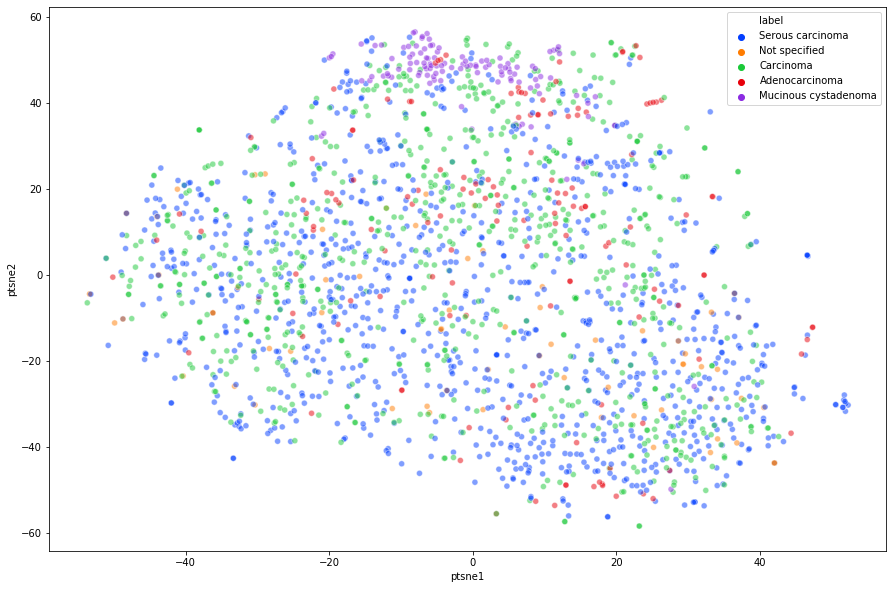

In [16]:
ovary.pcaTSNE()

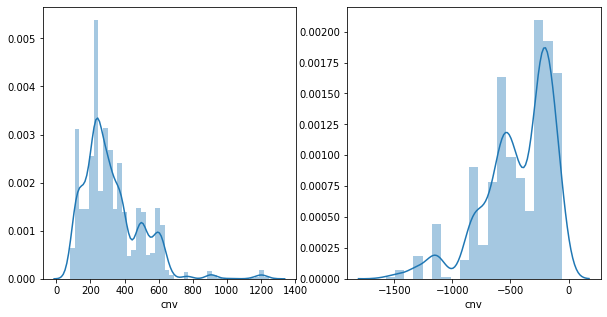

In [17]:
ovary.groupData()

In [18]:
ovary.analyze([900, 450, -1000, -300])
ovary.dumpFiles()

In [19]:
ovary.countData()

amp_genes	(510, 9)
del_genes	(401, 9)
genes	510
high_amp_genes	(30, 9)
low_amp_genes	(480, 9)
high_del_genes	(43, 9)
low_del_genes	(358, 9)
high_amp_census	(4, 9)
low_amp_census	(16, 9)
amp_census	(20, 9)
high_del_census	(2, 9)
low_del_census	(22, 9)
del_census	(24, 9)
census	44


### Carcinoma: 8010/3

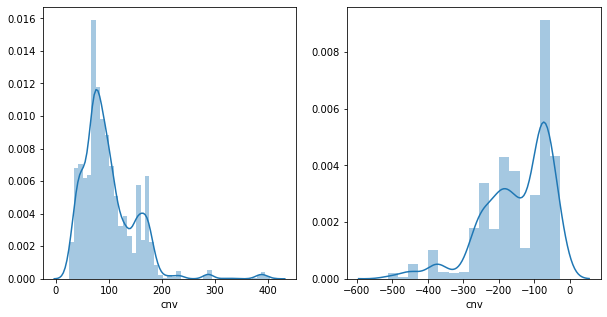

In [21]:
subtype = 'Carcinoma'
ovary.prepareSubtype(subtype)

In [22]:
ovary.analyzeSubtype(subtype,[270,140, -350,-150])
ovary.dumpSubtypeFiles(subtype)

### Adenocarcinoma: 8140/3, 8310/3, 8380/3

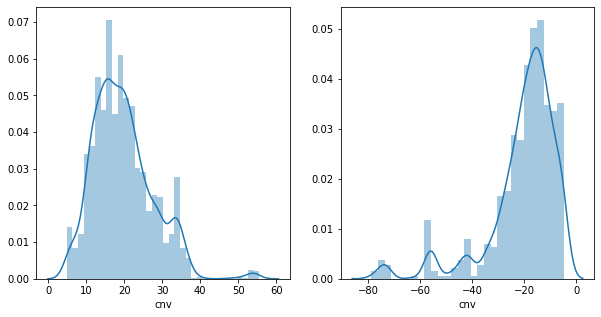

In [23]:
subtype = 'Adenocarcinoma'
ovary.prepareSubtype(subtype)

In [24]:
ovary.analyzeSubtype(subtype,[45,30, -70,-35])
ovary.dumpSubtypeFiles(subtype)

### Serous carcinoma: 8441/3, 8442/1

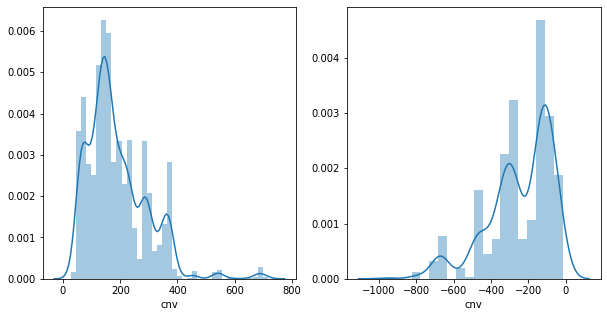

In [25]:
subtype = 'Serous carcinoma'
ovary.prepareSubtype(subtype)

In [26]:
ovary.analyzeSubtype(subtype,[500,250, -600,-200])
ovary.dumpSubtypeFiles(subtype)

### Mucinous cystadenoma: 8470/0, 8480/0

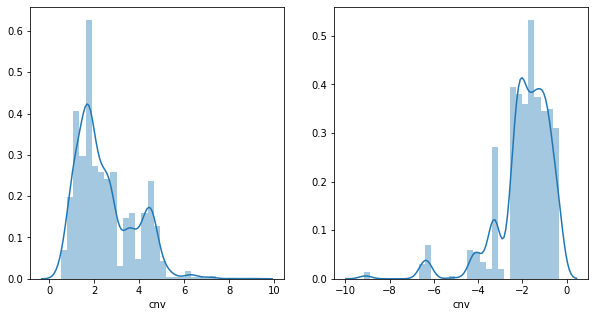

In [27]:
subtype = 'Mucinous cystadenoma'
ovary.prepareSubtype(subtype)

In [28]:
ovary.analyzeSubtype(subtype,[5,3, -5,-3])
ovary.dumpSubtypeFiles(subtype)

### Conclusion
After comparing signatures, "Carcinoma" and "Serous carcinoma" are almost identicial. Merge the two labels to "Carcinoma"

## Second label grouping

### Initialization

In [2]:
ovary = CancerType('Ovary')

In [3]:
ovary.countSubtypes()

[['80103' 761]
 ['81403' 111]
 ['83103' 24]
 ['83803' 11]
 ['84413' 964]
 ['84421' 45]
 ['84700' 57]
 ['84800' 60]
 ['C48.2' 13]
 ['C56' 38]
 ['None' 21]]


Merge "Carcinom" and "Serous Carcinoma"

In [4]:
code_remap = {'80103':'Carcinoma', 
              '81403':'Adenocarcinoma', 
              '83103':'Adenocarcinoma', 
              '83803':'Adenocarcinoma',
              '84413':'Carcinoma',
              '84421':'Carcinoma',
              '84700':'Mucinous cystadenoma',
              '84800':'Mucinous cystadenoma',
              'C48.2':'Not specified',
              'C56':'Not specified',
              'None':'Not specified'}

In [5]:
ovary.relabel(code_remap)

In [6]:
ovary.countSubtypes()

[['Adenocarcinoma' 146]
 ['Carcinoma' 1770]
 ['Mucinous cystadenoma' 117]
 ['Not specified' 72]]


In [7]:
ovary.dumpSubtypeCounts()

PCA done! Time elapsed: 0.21464896202087402 seconds
Cumulative explained variation for 50 principal components: 0.8445003866563029
t-SNE done! Time elapsed: 23.23719882965088 seconds


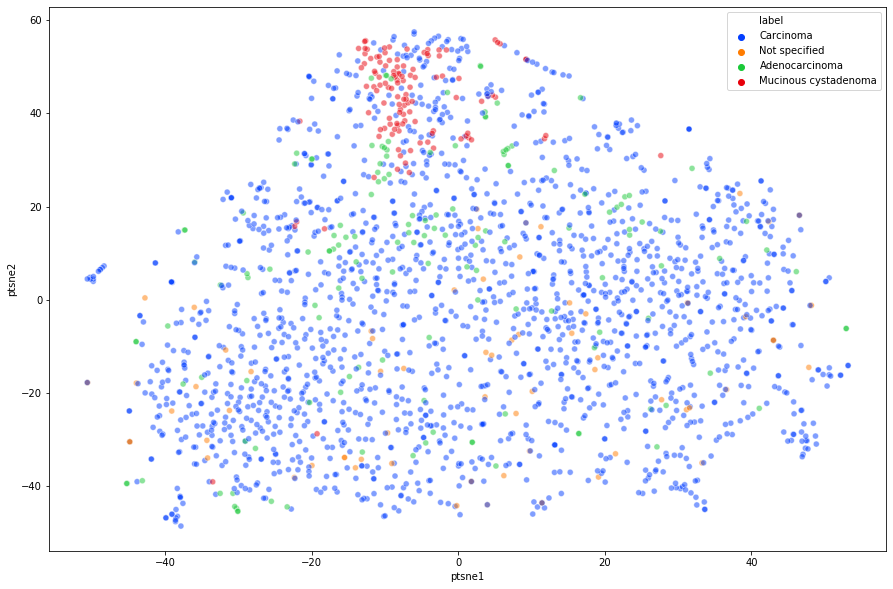

In [34]:
ovary.pcaTSNE()

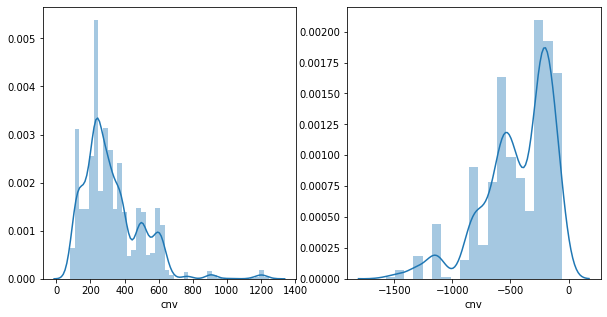

In [35]:
ovary.groupData()

In [36]:
ovary.analyze([900, 450, -1000, -300])
#ovary.dumpFiles()

In [37]:
ovary.countData()

amp_genes	(510, 9)
del_genes	(401, 9)
genes	510
high_amp_genes	(30, 9)
low_amp_genes	(480, 9)
high_del_genes	(43, 9)
low_del_genes	(358, 9)
high_amp_census	(4, 9)
low_amp_census	(16, 9)
amp_census	(20, 9)
high_del_census	(2, 9)
low_del_census	(22, 9)
del_census	(24, 9)
census	44


### Carcinoma: 8010/3, 8441/3, 8442/1

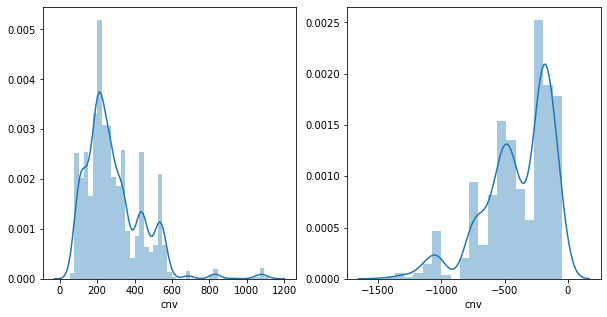

In [38]:
subtype = 'Carcinoma'
ovary.prepareSubtype(subtype)

In [39]:
ovary.analyzeSubtype(subtype,[700,400, -900,-300])
ovary.dumpSubtypeFiles(subtype)

### Adenocarcinoma: 8140/3, 8310/3, 8380/3

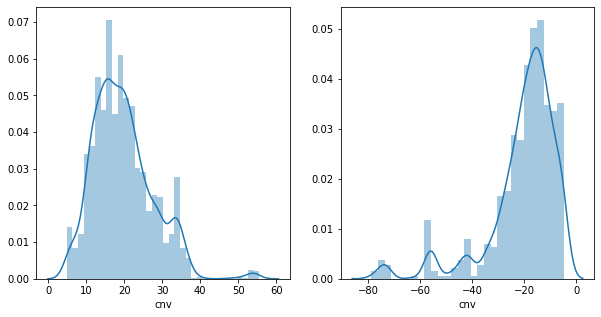

In [40]:
subtype = 'Adenocarcinoma'
ovary.prepareSubtype(subtype)

In [41]:
ovary.analyzeSubtype(subtype,[45,30, -70,-35])
ovary.dumpSubtypeFiles(subtype)

### Mucinous cystadenoma: 8470/0, 8480/0

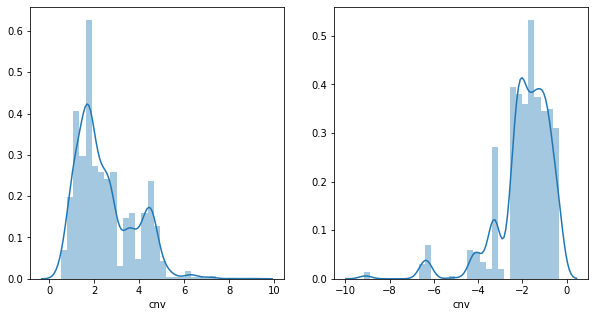

In [42]:
subtype = 'Mucinous cystadenoma'
ovary.prepareSubtype(subtype)

In [43]:
ovary.analyzeSubtype(subtype,[5,3, -5,-3])
ovary.dumpSubtypeFiles(subtype)